In [2]:
include("../src/obs_funcs.jl")
include("../src/fit_funcs.jl")
include("../src/utils.jl")

using CornerPlot
using CenQuenUtils

import BlackBoxOptim

INFO: Precompiling module CornerPlot.


In [3]:
# choose the sample to work on and load the data
sample_num = 1
datdf, vols = load_groupdat(sample_num)

(5638×46 DataFrames.DataFrame. Omitted printing of 39 columns
│ Row  │ foo    │ galid  │ groupid │ cenid  │ rband    │ Psat │ Mh         │
├──────┼────────┼────────┼─────────┼────────┼──────────┼──────┼────────────┤
│ 1    │ PROB10 │ 17     │ 2485    │ 17     │ -20.4593 │ 0.0  │ 1.5053e12  │
│ 2    │ PROB10 │ 83     │ 824     │ 83     │ -20.8211 │ 0.0  │ 4.7694e12  │
│ 3    │ PROB10 │ 93     │ 607     │ 93     │ -21.3781 │ 0.0  │ 6.43239e12 │
│ 4    │ PROB10 │ 99     │ 11864   │ 99     │ -18.7129 │ 0.0  │ 2.64106e11 │
│ 5    │ PROB10 │ 218    │ 1424    │ 218    │ -20.839  │ 0.0  │ 2.72175e12 │
│ 6    │ PROB10 │ 222    │ 1611    │ 222    │ -20.3164 │ 0.0  │ 2.39733e12 │
│ 7    │ PROB10 │ 237    │ 12835   │ 237    │ -18.4337 │ 0.0  │ 2.41424e11 │
│ 8    │ PROB10 │ 267    │ 3524    │ 267    │ -20.2159 │ 0.0  │ 1.0267e12  │
│ 9    │ PROB10 │ 303    │ 9229    │ 303    │ -19.1946 │ 0.0  │ 3.50912e11 │
│ 10   │ PROB10 │ 888    │ 7205    │ 888    │ -19.4307 │ 0.0  │ 4.63695e11 │
│ 11   │ PROB1

In [41]:
# load the corresponding mock
ths = [18, 19, 20]
th = ths[sample_num]
mockdf = CSV.read("../dat/mocks/M$(@sprintf("%d", th))_cenquen_mock.csv")

340299×10 DataFrames.DataFrame. Omitted printing of 5 columns
│ Row    │ halo_id   │ halo_mvir │ halo_rvir │ halo_nfw_conc │ halo_spin │
├────────┼───────────┼───────────┼───────────┼───────────────┼───────────┤
│ 1      │ 1.61861e9 │ 1.874e12  │ 0.304327  │ 6.89682       │ 0.05261   │
│ 2      │ 1.63092e9 │ 9.664e11  │ 0.244045  │ 5.59839       │ 0.04884   │
│ 3      │ 1.62097e9 │ 1.987e11  │ 0.14404   │ 11.9319       │ 0.11176   │
│ 4      │ 1.62619e9 │ 2.466e11  │ 0.154792  │ 5.4457        │ 0.06799   │
│ 5      │ 1.62597e9 │ 2.916e11  │ 0.163687  │ 16.3317       │ 0.08206   │
│ 6      │ 1.62036e9 │ 2.608e11  │ 0.157708  │ 13.718        │ 0.05617   │
│ 7      │ 1.62444e9 │ 3.123e11  │ 0.167472  │ 11.7278       │ 0.0693    │
│ 8      │ 1.63231e9 │ 3.519e11  │ 0.174271  │ 13.4816       │ 0.04343   │
│ 9      │ 1.62453e9 │ 2.111e11  │ 0.146976  │ 15.6769       │ 0.0526    │
│ 10     │ 1.63772e9 │ 4.205e11  │ 0.184929  │ 7.11511       │ 0.0682    │
│ 11     │ 1.62513e9 │ 2.478e11  │ 0.155043  │ 8.16723       │ 0.05444   │
⋮
│ 340288 │ 1.62786e9 │ 7.659e11  │ 0.225844  │ 7.66671       │ 0.06412   │
│ 340289 │ 1.63771e9 │ 2.161e12  │ 0.319131  │ 9.67127       │ 0.01739   │
│ 340290 │ 1.63305e9 │ 2.43e12   │ 0.331858  │ 7.20604       │ 0.12503   │
│ 340291 │ 1.62725e9 │ 7.286e12  │ 0.478535  │ 9.06439       │ 0.02552   │
│ 340292 │ 1.63619e9 │ 4.963e12  │ 0.421049  │ 6.92997       │ 0.04946   │
│ 340293 │ 1.61959e9 │ 4.096e12  │ 0.394946  │ 12.3923       │ 0.08216   │
│ 340294 │ 1.62081e9 │ 3.189e12  │ 0.363331  │ 6.47105       │ 0.0216    │
│ 340295 │ 1.61922e9 │ 1.42e13   │ 0.597742  │ 3.35309       │ 0.05329   │
│ 340296 │ 1.63778e9 │ 2.438e12  │ 0.332222  │ 8.17004       │ 0.05233   │
│ 340297 │ 1.62502e9 │ 5.814e12  │ 0.443856  │ 6.87352       │ 0.08335   │
│ 340298 │ 1.61937e9 │ 4.977e12  │ 0.421444  │ 6.62261       │ 0.14187   │
│ 340299 │ 1.63186e9 │ 5.661e12  │ 0.439928  │ 5.89202       │ 0.13846   │

In [42]:
## add extra columns for modeling
mockdf[:logMh] = log10.(mockdf[:halo_mvir])
mockdf[:Mdot] = (mockdf[:halo_mvir] .- mockdf[:halo_mz_1]) ./ mockdf[:halo_mz_1]
mockdf[:Mdot][mockdf[:halo_mz_1] .== 0] = 1
mockdf[:logMd] = log10.(mockdf[:Mdot] + 1)
mockdf[:logc] = log10.(mockdf[:halo_nfw_conc])
mockdf[:logspin] = log10.(mockdf[:halo_spin])
mockdf[:logρ] = log10.(mockdf[:delta] + 1)
mockdf[:logRe] = ones(mockdf[:log10M]) * mean(datdf[:logRe])
mockdf[:logsurf] = ones(mockdf[:log10M]) * mean(datdf[:logsurf])
mockdf[:logv] = ones(mockdf[:log10M]) * mean(datdf[:logv])

340299-element Array{Float64,1}:
 2.13704
 2.13704
 2.13704
 2.13704
 2.13704
 2.13704
 2.13704
 2.13704
 2.13704
 2.13704
 2.13704
 2.13704
 2.13704
 ⋮      
 2.13704
 2.13704
 2.13704
 2.13704
 2.13704
 2.13704
 2.13704
 2.13704
 2.13704
 2.13704
 2.13704
 2.13704

In [43]:
# choose which variables to optimise the parameters for:
# [effective radius, surface density, velocity dispersion]
varswitch = [0, 0, 0]

3-element Array{Int64,1}:
 0
 0
 0

In [44]:
# Define the bin edges of the galaxy properties
if sample_num == 1
    const mbins = [9.4, 9.6, 9.8, 10.0, 10.2, 10.4, 10.6, 10.8, 11.0]
elseif sample_num == 2
    const mbins = [9.8, 10.0, 10.2, 10.4, 10.6, 10.8, 11.0]
elseif sample_num == 3
    const mbins = [10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0]
end
const dbins = linspace(-0.8, 1.0, 9)

# store the number of mass and environment density bins
const nmbins = length(mbins) - 1
const ndbins = length(dbins) - 1

if varswitch[1] == 1
    const rbins = [-3, -2.75, -2.5, -2.25, -2, -1.75]
else
    const rbins = [minimum(datdf[:logRe]), maximum(datdf[:logRe]) + 1]
end

if varswitch[2] == 1
    const sbins = [8.5, 8.7, 8.9, 9.1, 9.3, 9.5]
else
    const sbins = [minimum(datdf[:logsurf]), maximum(datdf[:logsurf]) + 1]
end

if varswitch[3] == 1
    const vbins = [1.9, 2.02, 2.14, 2.26, 2.38, 2.5]
else
    const vbins = [minimum(datdf[:logv]), maximum(datdf[:logv]) + 1]
end

2-element Array{Float64,1}:
 1.1625 
 3.53577

In [45]:
# the dataframe columns that are relevant for modeling
const datcols = [:log10M, :logρ, :logRe, :logsurf, :logv]
const mockcols = [:logMh, :logMd, :logc, :logspin, :log10M, :logρ, :logRe, :logsurf, :logv]

# build dataframe arrays for making galaxy counts within each of the mass-environment histogram bins
const deltadat = Array{Array{DataFrame, 1}}(nmbins)

for i in 1:nmbins
    deltadat[i] = Array{DataFrame}(ndbins)
    massdf = datdf[mbins[i] .<= datdf[:log10M] .< mbins[i + 1], datcols]
    for j in 1:ndbins
        deltadat[i][j] = massdf[dbins[j] .<= massdf[:logρ] .< dbins[j + 1], datcols]
    end
end

# and similar for the mock
const mockdfarr = Array{Array{DataFrame, 1}}(nmbins)

for i in 1:nmbins
    mockdfarr[i] = Array{DataFrame}(ndbins)
    massdf = mockdf[mbins[i] .<= mockdf[:log10M] .< mbins[i + 1], mockcols]
    for j in 1:ndbins
        mockdfarr[i][j] = massdf[dbins[j] .<= massdf[:logρ] .< dbins[j + 1], mockcols]
    end
end

In [46]:
# get the observations
const obsdat = bincounts(deltadat, rbins, sbins, vbins)

64-element Array{Int64,1}:
   7
  12
  37
  70
 106
  42
  22
   5
  10
  30
  54
 124
 170
   ⋮
 140
  89
  42
  10
   1
   1
   9
  27
  38
  34
  17
   2

In [47]:
# get the observations
mockmds = bincounts(mockdfarr, rbins, sbins, vbins)

64-element Array{Int64,1}:
  254
  968
 2387
 4395
 4797
 3374
 1328
  223
  481
 1639
 4381
 7951
 9017
    ⋮
 7814
 6380
 2657
  485
   30
  162
  646
 1752
 2656
 2305
 1065
  204

In [48]:
# create a mask of the nonzero elements of the observations
const nonzmask = find(obsdat .> 0)

# and a tuple of the sums of the data and the log of the data
const obsums = (sum(obsdat), sum(obsdat[nonzmask] .* (log.(obsdat[nonzmask]))))

(5601, 27717.33204470837)

In [49]:
# Get the conversion factor to compare the simulation volume with the data
const volfac = vols[sample_num] / 400^3

# and add method to model bincount generation
gen_mod_bincounts(params::Array{Float64,1}) = gen_mod_bincounts(params,
                                                                mockdfarr,
                                                                varswitch,
                                                                rbins, sbins, vbins)

gen_mod_bincounts (generic function with 2 methods)

In [50]:
nmds = [64, 48, 56]
nmd = nmds[sample_num]

64

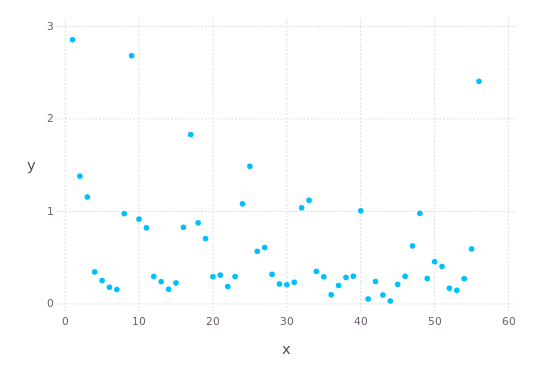

In [93]:
plot(x=1:nmd, y=abs.(obsdat .- (volfac * mockmds)) ./ (volfac * mockmds), Geom.point)

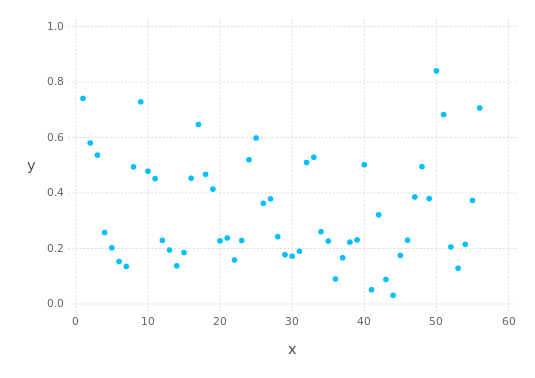

In [94]:
plot(x=1:nmd, y=abs.(obsdat .- (volfac * mockmds)) ./ obsdat, Geom.point)

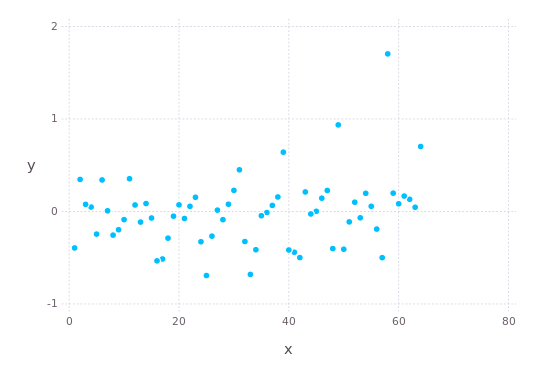

ERROR (unhandled task failure): OutOfMemoryError()
Stacktrace:
 [1] setindex!(::ObjectIdDict, ::Any, ::Any) at ./associative.jl:430
 [2] preserve_handle at ./libuv.jl:51 [inlined]
 [3] stream_wait(::Timer, ::Condition, ::Vararg{Condition,N} where N) at ./stream.jl:40
 [4] wait(::Timer) at ./event.jl:357
 [5] (::Base.##302#303{IJulia.#send_stdout,Timer})() at ./event.jl:430


In [51]:
# M > - 18
plot(x=1:nmd, y=((volfac * mockmds) .- obsdat) ./ obsdat, Geom.point)

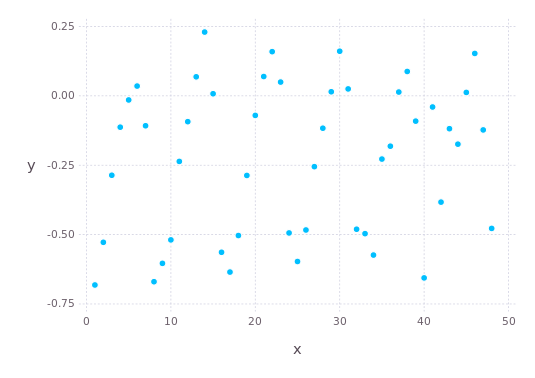

In [39]:
# M > - 19
plot(x=1:nmd, y=((volfac * mockmds) .- obsdat) ./ obsdat, Geom.point)

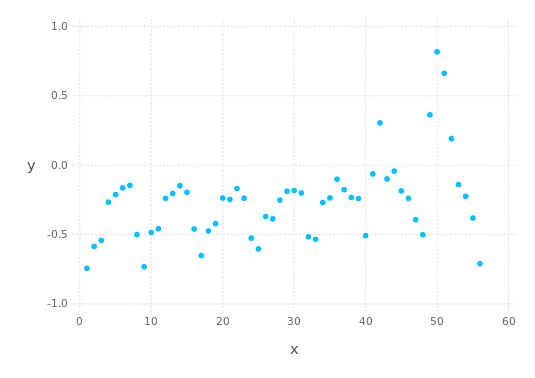

In [27]:
# M > -20 sample
plot(x=1:nmd, y=((volfac * mockmds) .- obsdat) ./ obsdat, Geom.point)

In [96]:
mean(abs.(obsdat .- (volfac * mockmds)) ./ obsdat)

0.33970059597979524

In [97]:
mean(abs.(obsdat .- (volfac * mockmds)) ./ (volfac * mockmds))

0.6194822411318858

In [98]:
sqrt(mean(((obsdat .- (volfac * mockmds))  ./ obsdat) .^ 2))

0.39254430360072323

In [11]:
# and now to set up likelihood function
function like(params::Array{Float64,1})
    
    mockhist = gen_mod_bincounts(params)
    mockhist = mockhist * volfac + exp(-125)  # 
    
    score = cstat(mockhist, obsdat, obsums, nonzmask)
    
    score
end

like (generic function with 1 method)

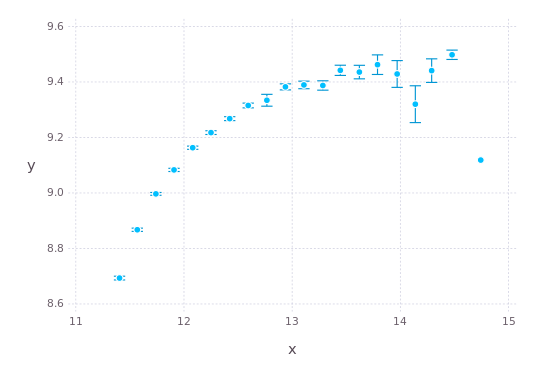

In [50]:
plot_binned_errs(datdf[:logMh], datdf[:logsurf], 20)

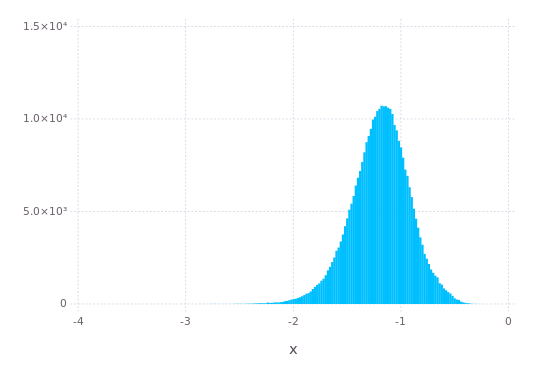

In [15]:
plot(x = mockdf[:logspin], Geom.histogram)

In [12]:
ndims = 6 * sum(varswitch)
npop = ndims * 10

x0 = randn(ndims, npop)
x0[1, :] += mean(datdf[:logRe])  # initialise offset near mean radius

lower = 1.0 * [-50, -5, -20, -100, -10, -10]
upper = 1.0 * [50, 10, 10, 100, 10, 10]

optctrl = BlackBoxOptim.bbsetup(like;  # Method = :dxnes,\n",
                                SearchRange = collect(zip(lower, upper)),
                                #Population = x0,
                                PopulationSize = npop)

BlackBoxOptim.OptController{BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64},BlackBoxOptim.RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},BlackBoxOptim.RandomBound{BlackBoxOptim.RangePerDimSearchSpace}},BlackBoxOptim.FunctionBasedProblem{BlackBoxOptim.ScalarFitnessScheme{true},BlackBoxOptim.RangePerDimSearchSpace,Void}}(BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64},BlackBoxOptim.RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},BlackBoxOptim.RandomBound{BlackBoxOptim.RangePerDimSearchSpace}}("AdaptiveDE/rand/1/bin/radiuslimited", BlackBoxOptim.FitPopulation{Float64}([33.8462 -39.2419 … -1.40819 -33.9922; 9.22098 2.87163 … 8.22409 1.55728; … ; 4.88526 0.380946 … 5.19677 -2.57113; -1.44107 1.31334 … -8.0511 5.21601], NaN, [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], 0, BlackBoxOptim.Candidate{Float64}[]), BlackBoxOptim.RadiusLimitedSelector(8), BlackBoxOptim.AdaptiveDiffEvo

In [13]:
res = BlackBoxOptim.bboptimize(optctrl; MaxSteps = 3000)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64},BlackBoxOptim.RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},BlackBoxOptim.RandomBound{BlackBoxOptim.RangePerDimSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.80 secs, 4 evals, 2 steps, improv/step: 1.000 (last = 1.0000), fitness=1413380.053089255
1.49 secs, 8 evals, 4 steps, improv/step: 1.000 (last = 1.0000), fitness=1413380.053089255
2.12 secs, 12 evals, 6 steps, improv/step: 0.833 (last = 0.5000), fitness=982157.604656407
2.75 secs, 16 evals, 8 steps, improv/step: 0.875 (last = 1.0000), fitness=982157.604656407
3.48 secs, 20 evals, 10 steps, improv/step: 0.900 (last = 1.0000), fitness=982157.604656407
4.17 secs, 24 evals, 12 steps, improv/step: 0.917 (last = 1.0000), fitness=982157.604656407
4.87 secs, 28 evals, 14 steps, improv/step: 0.929 (last = 1.0000), fitness=982157.604656407
5.61 secs, 33 evals, 17 steps, improv/step: 0.941 (last = 1.0000), fitness=982157.604656407


52.82 secs, 350 evals, 280 steps, improv/step: 0.929 (last = 1.0000), fitness=111146.892610780
53.38 secs, 354 evals, 284 steps, improv/step: 0.930 (last = 1.0000), fitness=111146.892610780
53.94 secs, 358 evals, 288 steps, improv/step: 0.931 (last = 1.0000), fitness=111146.892610780
54.62 secs, 362 evals, 292 steps, improv/step: 0.928 (last = 0.7500), fitness=111146.892610780
55.24 secs, 366 evals, 296 steps, improv/step: 0.929 (last = 1.0000), fitness=111146.892610780
55.79 secs, 370 evals, 300 steps, improv/step: 0.930 (last = 1.0000), fitness=111146.892610780
56.35 secs, 374 evals, 304 steps, improv/step: 0.931 (last = 1.0000), fitness=111146.892610780
56.91 secs, 378 evals, 308 steps, improv/step: 0.932 (last = 1.0000), fitness=111146.892610780
57.48 secs, 382 evals, 311 steps, improv/step: 0.929 (last = 0.6667), fitness=111146.892610780
58.03 secs, 386 evals, 315 steps, improv/step: 0.930 (last = 1.0000), fitness=111146.892610780
58.62 secs, 390 evals, 319 steps, improv/step: 0.9

104.87 secs, 702 evals, 615 steps, improv/step: 0.896 (last = 0.6667), fitness=9543.479539581
105.47 secs, 706 evals, 618 steps, improv/step: 0.896 (last = 1.0000), fitness=9543.479539581
106.05 secs, 710 evals, 622 steps, improv/step: 0.894 (last = 0.5000), fitness=9543.479539581
106.64 secs, 714 evals, 626 steps, improv/step: 0.895 (last = 1.0000), fitness=9543.479539581
107.25 secs, 718 evals, 630 steps, improv/step: 0.894 (last = 0.7500), fitness=9543.479539581
107.82 secs, 722 evals, 634 steps, improv/step: 0.893 (last = 0.7500), fitness=9543.479539581
108.41 secs, 726 evals, 638 steps, improv/step: 0.893 (last = 1.0000), fitness=9543.479539581
109.01 secs, 730 evals, 642 steps, improv/step: 0.894 (last = 1.0000), fitness=9543.479539581
109.64 secs, 734 evals, 646 steps, improv/step: 0.895 (last = 1.0000), fitness=9543.479539581
110.21 secs, 738 evals, 650 steps, improv/step: 0.895 (last = 1.0000), fitness=9543.479539581
110.79 secs, 742 evals, 654 steps, improv/step: 0.893 (last 

157.39 secs, 1045 evals, 944 steps, improv/step: 0.823 (last = 0.7500), fitness=9543.479539581
157.99 secs, 1049 evals, 948 steps, improv/step: 0.823 (last = 0.7500), fitness=9543.479539581
158.59 secs, 1053 evals, 952 steps, improv/step: 0.822 (last = 0.7500), fitness=9543.479539581
159.19 secs, 1057 evals, 955 steps, improv/step: 0.822 (last = 0.6667), fitness=9543.479539581
159.69 secs, 1060 evals, 958 steps, improv/step: 0.819 (last = 0.0000), fitness=9543.479539581
160.28 secs, 1064 evals, 962 steps, improv/step: 0.819 (last = 0.7500), fitness=9543.479539581
160.85 secs, 1068 evals, 966 steps, improv/step: 0.818 (last = 0.5000), fitness=9543.479539581
161.44 secs, 1072 evals, 970 steps, improv/step: 0.819 (last = 1.0000), fitness=9543.479539581
162.02 secs, 1076 evals, 974 steps, improv/step: 0.819 (last = 1.0000), fitness=9543.479539581
162.65 secs, 1080 evals, 978 steps, improv/step: 0.819 (last = 0.7500), fitness=9543.479539581
163.25 secs, 1084 evals, 982 steps, improv/step: 0

208.39 secs, 1383 evals, 1277 steps, improv/step: 0.760 (last = 0.7500), fitness=9543.479539581
208.98 secs, 1387 evals, 1281 steps, improv/step: 0.760 (last = 0.5000), fitness=9543.479539581
209.50 secs, 1390 evals, 1283 steps, improv/step: 0.759 (last = 0.5000), fitness=9543.479539581
210.03 secs, 1393 evals, 1286 steps, improv/step: 0.759 (last = 0.6667), fitness=9543.479539581
210.64 secs, 1397 evals, 1290 steps, improv/step: 0.758 (last = 0.5000), fitness=9543.479539581
211.23 secs, 1401 evals, 1294 steps, improv/step: 0.759 (last = 1.0000), fitness=9543.479539581
211.74 secs, 1404 evals, 1297 steps, improv/step: 0.758 (last = 0.3333), fitness=9543.479539581
212.38 secs, 1408 evals, 1300 steps, improv/step: 0.758 (last = 1.0000), fitness=9543.479539581
212.95 secs, 1412 evals, 1304 steps, improv/step: 0.758 (last = 0.7500), fitness=9543.479539581
213.57 secs, 1416 evals, 1308 steps, improv/step: 0.758 (last = 0.7500), fitness=9543.479539581
214.18 secs, 1420 evals, 1312 steps, imp

258.21 secs, 1705 evals, 1597 steps, improv/step: 0.698 (last = 0.2500), fitness=9543.479539581
258.81 secs, 1709 evals, 1601 steps, improv/step: 0.696 (last = 0.0000), fitness=9543.479539581
259.48 secs, 1713 evals, 1605 steps, improv/step: 0.695 (last = 0.2500), fitness=9543.479539581
260.08 secs, 1717 evals, 1609 steps, improv/step: 0.694 (last = 0.2500), fitness=9543.479539581
260.65 secs, 1721 evals, 1613 steps, improv/step: 0.694 (last = 0.5000), fitness=9543.479539581
261.23 secs, 1725 evals, 1617 steps, improv/step: 0.693 (last = 0.5000), fitness=9543.479539581
261.85 secs, 1729 evals, 1621 steps, improv/step: 0.692 (last = 0.2500), fitness=9543.479539581
262.44 secs, 1733 evals, 1625 steps, improv/step: 0.692 (last = 0.7500), fitness=9543.479539581
263.02 secs, 1737 evals, 1629 steps, improv/step: 0.691 (last = 0.2500), fitness=9543.479539581
263.68 secs, 1741 evals, 1633 steps, improv/step: 0.690 (last = 0.2500), fitness=9543.479539581
264.19 secs, 1744 evals, 1636 steps, imp

309.06 secs, 2008 evals, 1900 steps, improv/step: 0.633 (last = 0.0000), fitness=9543.479539581
309.69 secs, 2011 evals, 1903 steps, improv/step: 0.632 (last = 0.0000), fitness=9543.479539581
310.20 secs, 2014 evals, 1906 steps, improv/step: 0.632 (last = 0.3333), fitness=9543.479539581
310.81 secs, 2018 evals, 1910 steps, improv/step: 0.631 (last = 0.2500), fitness=9543.479539581
311.35 secs, 2021 evals, 1913 steps, improv/step: 0.630 (last = 0.0000), fitness=9543.479539581
312.00 secs, 2025 evals, 1917 steps, improv/step: 0.629 (last = 0.0000), fitness=9543.479539581
312.68 secs, 2029 evals, 1921 steps, improv/step: 0.628 (last = 0.5000), fitness=9543.479539581
313.27 secs, 2032 evals, 1924 steps, improv/step: 0.628 (last = 0.3333), fitness=9543.479539581
313.84 secs, 2035 evals, 1927 steps, improv/step: 0.627 (last = 0.0000), fitness=9543.479539581
314.40 secs, 2038 evals, 1930 steps, improv/step: 0.626 (last = 0.0000), fitness=9543.479539581
314.99 secs, 2041 evals, 1933 steps, imp

359.91 secs, 2322 evals, 2214 steps, improv/step: 0.578 (last = 0.6667), fitness=9543.479539581
360.54 secs, 2326 evals, 2218 steps, improv/step: 0.577 (last = 0.2500), fitness=9543.479539581
361.15 secs, 2330 evals, 2222 steps, improv/step: 0.577 (last = 0.2500), fitness=9543.479539581
361.74 secs, 2334 evals, 2226 steps, improv/step: 0.575 (last = 0.0000), fitness=9543.479539581
362.36 secs, 2338 evals, 2230 steps, improv/step: 0.575 (last = 0.2500), fitness=9543.479539581
363.03 secs, 2342 evals, 2234 steps, improv/step: 0.574 (last = 0.0000), fitness=9543.479539581
363.65 secs, 2346 evals, 2238 steps, improv/step: 0.573 (last = 0.0000), fitness=9543.479539581
364.30 secs, 2350 evals, 2242 steps, improv/step: 0.572 (last = 0.0000), fitness=9543.479539581
364.82 secs, 2353 evals, 2245 steps, improv/step: 0.571 (last = 0.0000), fitness=9543.479539581
365.44 secs, 2357 evals, 2249 steps, improv/step: 0.570 (last = 0.0000), fitness=9543.479539581
366.05 secs, 2361 evals, 2253 steps, imp

411.72 secs, 2644 evals, 2536 steps, improv/step: 0.522 (last = 0.0000), fitness=6868.850935821
412.23 secs, 2647 evals, 2539 steps, improv/step: 0.522 (last = 0.3333), fitness=6868.850935821
412.85 secs, 2651 evals, 2543 steps, improv/step: 0.521 (last = 0.2500), fitness=6868.850935821
413.46 secs, 2655 evals, 2547 steps, improv/step: 0.521 (last = 0.2500), fitness=6868.850935821
414.10 secs, 2659 evals, 2551 steps, improv/step: 0.520 (last = 0.0000), fitness=6868.850935821
414.67 secs, 2662 evals, 2554 steps, improv/step: 0.520 (last = 0.0000), fitness=6868.850935821
415.19 secs, 2665 evals, 2557 steps, improv/step: 0.519 (last = 0.3333), fitness=6868.850935821
415.80 secs, 2669 evals, 2561 steps, improv/step: 0.519 (last = 0.5000), fitness=6868.850935821
416.45 secs, 2673 evals, 2565 steps, improv/step: 0.519 (last = 0.5000), fitness=6868.850935821
417.06 secs, 2677 evals, 2569 steps, improv/step: 0.518 (last = 0.0000), fitness=6868.850935821
417.64 secs, 2681 evals, 2573 steps, imp

462.87 secs, 2944 evals, 2836 steps, improv/step: 0.480 (last = 0.3333), fitness=6868.850935821
463.50 secs, 2948 evals, 2840 steps, improv/step: 0.480 (last = 0.2500), fitness=6868.850935821
464.17 secs, 2952 evals, 2844 steps, improv/step: 0.479 (last = 0.0000), fitness=6868.850935821
464.84 secs, 2955 evals, 2847 steps, improv/step: 0.478 (last = 0.0000), fitness=6868.850935821
465.46 secs, 2958 evals, 2850 steps, improv/step: 0.478 (last = 0.0000), fitness=6868.850935821
465.98 secs, 2960 evals, 2852 steps, improv/step: 0.478 (last = 0.0000), fitness=6868.850935821
466.54 secs, 2963 evals, 2855 steps, improv/step: 0.477 (last = 0.0000), fitness=6868.850935821
467.22 secs, 2967 evals, 2859 steps, improv/step: 0.476 (last = 0.0000), fitness=6868.850935821
467.79 secs, 2970 evals, 2862 steps, improv/step: 0.476 (last = 0.0000), fitness=6868.850935821
468.32 secs, 2973 evals, 2865 steps, improv/step: 0.475 (last = 0.0000), fitness=6868.850935821
468.96 secs, 2977 evals, 2869 steps, imp

BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (3000) reached", 3001, 1.533752609662455e9, 492.75052094459534, BlackBoxOptim.DictChain{Symbol,Any}[Dict{Symbol,Any}(Pair{Symbol,Any}(:RngSeed, 938604),Pair{Symbol,Any}(:MaxSteps, 3000)),BlackBoxOptim.DictChain{Symbol,Any}[BlackBoxOptim.DictChain{Symbol,Any}[Dict{Symbol,Any}(Pair{Symbol,Any}(:SearchRange, Tuple{Float64,Float64}[(-50.0, 50.0), (-5.0, 10.0), (-20.0, 10.0), (-100.0, 100.0), (-10.0, 10.0), (-10.0, 10.0)]),Pair{Symbol,Any}(:MaxSteps, 10000),Pair{Symbol,Any}(:PopulationSize, 60)),Dict{Symbol,Any}()],Dict{Symbol,Any}(Pair{Symbol,Any}(:FitnessScheme, BlackBoxOptim.ScalarFitnessScheme{true}()),Pair{Symbol,Any}(:NumDimensions, :NotSpecified),Pair{Symbol,Any}(:PopulationSize, 50),Pair{Symbol,Any}(:MaxTime, 0.0),Pair{Symbol,Any}(:SearchRange, (-1.0, 1.0)),Pair{Symbol,Any}(:Method, :adaptive_de_rand_1_bin_radiuslimited),Pair{Symbol,Any}(:MaxNumStepsWithoutFuncEvals, 100),Pair{Symbol,Any}(

[-14.8383, -0.203262, 0.0724477, 11.6576, 4.16694, 0.188242]

Fitness: 6868.850935821



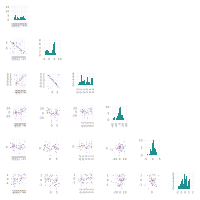

In [20]:
# create a chain of the final population positions to start a new run
# this step can be returned to many times
optchain = zeros(ndims, npop)
for i in 1:npop
    optchain[:, i] = optctrl.optimizer.population[i]
end

# we can inspect the positions of the population if we wish
corner(optchain')

In [21]:
# run more steps with the final population of the last run
optctrl = BlackBoxOptim.bbsetup(like;  # Method = :dxnes,\n",
                                SearchRange = collect(zip(lower, upper)),
                                Population = optchain,
                                PopulationSize = npop)

BlackBoxOptim.OptController{BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64},BlackBoxOptim.RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},BlackBoxOptim.RandomBound{BlackBoxOptim.RangePerDimSearchSpace}},BlackBoxOptim.FunctionBasedProblem{BlackBoxOptim.ScalarFitnessScheme{true},BlackBoxOptim.RangePerDimSearchSpace,Void}}(BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64},BlackBoxOptim.RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},BlackBoxOptim.RandomBound{BlackBoxOptim.RangePerDimSearchSpace}}("AdaptiveDE/rand/1/bin/radiuslimited", BlackBoxOptim.FitPopulation{Float64}([-41.5471 -31.5251 … -27.4963 -38.4186; 5.50991 4.76311 … 2.92964 4.08617; … ; -0.46604 -2.29878 … 1.69299 2.63368; 0.608569 1.30866 … -1.03067 -1.20798], NaN, [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], 0, BlackBoxOptim.Candidate{Float64}[]), BlackBoxOptim.RadiusLimitedSelector(8), BlackBoxOptim.AdaptiveDiff

In [22]:
res = BlackBoxOptim.bboptimize(optctrl; MaxSteps = 3000)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64},BlackBoxOptim.RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},BlackBoxOptim.RandomBound{BlackBoxOptim.RangePerDimSearchSpace}}
0.00 secs, 0 evals, 0 steps
1.25 secs, 2 evals, 1 steps, fitness=1844.159780850
1.98 secs, 4 evals, 2 steps, fitness=1844.159780850
2.63 secs, 6 evals, 3 steps, fitness=1844.159780850
3.50 secs, 10 evals, 5 steps, fitness=1844.159780850
4.37 secs, 14 evals, 7 steps, fitness=1844.159780850
4.91 secs, 16 evals, 8 steps, fitness=1844.159780850
5.92 secs, 20 evals, 10 steps, improv/step: 0.100 (last = 0.5000), fitness=1844.159780850
6.51 secs, 22 evals, 11 steps, improv/step: 0.091 (last = 0.0000), fitness=1844.159780850
7.12 secs, 24 evals, 12 steps, improv/step: 0.083 (last = 0.0000), fitness=1844.159780850
8.05 secs, 28 evals, 14 steps, improv/step: 0.071 (last = 0.0000), fitness=1844.159780850
9.17 secs, 30 evals, 15 steps, improv/step: 0.133 (last =

70.48 secs, 266 evals, 142 steps, improv/step: 0.099 (last = 0.0000), fitness=1741.647682372
71.16 secs, 269 evals, 144 steps, improv/step: 0.097 (last = 0.0000), fitness=1741.647682372
71.91 secs, 272 evals, 146 steps, improv/step: 0.096 (last = 0.0000), fitness=1741.647682372
72.56 secs, 275 evals, 148 steps, improv/step: 0.095 (last = 0.0000), fitness=1741.647682372
73.17 secs, 278 evals, 150 steps, improv/step: 0.093 (last = 0.0000), fitness=1741.647682372
74.65 secs, 282 evals, 152 steps, improv/step: 0.099 (last = 0.5000), fitness=1741.647682372
75.47 secs, 286 evals, 154 steps, improv/step: 0.097 (last = 0.0000), fitness=1741.647682372
76.41 secs, 289 evals, 156 steps, improv/step: 0.096 (last = 0.0000), fitness=1741.647682372
77.38 secs, 293 evals, 158 steps, improv/step: 0.095 (last = 0.0000), fitness=1741.647682372
78.06 secs, 296 evals, 160 steps, improv/step: 0.094 (last = 0.0000), fitness=1741.647682372
78.65 secs, 298 evals, 161 steps, improv/step: 0.093 (last = 0.0000), 

137.31 secs, 521 evals, 295 steps, improv/step: 0.095 (last = 0.0000), fitness=1741.647682372
138.36 secs, 523 evals, 296 steps, improv/step: 0.098 (last = 1.0000), fitness=1741.647682372
138.86 secs, 525 evals, 298 steps, improv/step: 0.097 (last = 0.0000), fitness=1741.647682372
139.76 secs, 529 evals, 300 steps, improv/step: 0.097 (last = 0.0000), fitness=1741.647682372
140.77 secs, 533 evals, 303 steps, improv/step: 0.099 (last = 0.3333), fitness=1741.647682372
141.41 secs, 535 evals, 304 steps, improv/step: 0.099 (last = 0.0000), fitness=1741.647682372
142.28 secs, 539 evals, 306 steps, improv/step: 0.098 (last = 0.0000), fitness=1741.647682372
143.16 secs, 543 evals, 308 steps, improv/step: 0.097 (last = 0.0000), fitness=1741.647682372
143.83 secs, 546 evals, 310 steps, improv/step: 0.097 (last = 0.0000), fitness=1741.647682372
144.64 secs, 548 evals, 311 steps, improv/step: 0.096 (last = 0.0000), fitness=1741.647682372
145.53 secs, 550 evals, 312 steps, improv/step: 0.096 (last 

203.02 secs, 781 evals, 473 steps, improv/step: 0.093 (last = 0.0000), fitness=1636.195677855
204.17 secs, 784 evals, 475 steps, improv/step: 0.093 (last = 0.0000), fitness=1636.195677855
204.68 secs, 787 evals, 478 steps, improv/step: 0.092 (last = 0.0000), fitness=1636.195677855
205.28 secs, 789 evals, 480 steps, improv/step: 0.092 (last = 0.0000), fitness=1636.195677855
206.11 secs, 793 evals, 483 steps, improv/step: 0.091 (last = 0.0000), fitness=1636.195677855
206.84 secs, 796 evals, 485 steps, improv/step: 0.091 (last = 0.0000), fitness=1636.195677855
207.67 secs, 799 evals, 487 steps, improv/step: 0.094 (last = 1.0000), fitness=1636.195677855
208.39 secs, 802 evals, 489 steps, improv/step: 0.094 (last = 0.0000), fitness=1636.195677855
209.19 secs, 805 evals, 491 steps, improv/step: 0.096 (last = 0.5000), fitness=1636.195677855
210.37 secs, 808 evals, 493 steps, improv/step: 0.097 (last = 0.5000), fitness=1636.195677855
210.90 secs, 810 evals, 495 steps, improv/step: 0.097 (last 

264.88 secs, 1019 evals, 652 steps, improv/step: 0.095 (last = 0.0000), fitness=1636.195677855
265.39 secs, 1021 evals, 654 steps, improv/step: 0.095 (last = 0.0000), fitness=1636.195677855
266.03 secs, 1023 evals, 655 steps, improv/step: 0.095 (last = 0.0000), fitness=1636.195677855
266.60 secs, 1025 evals, 656 steps, improv/step: 0.095 (last = 0.0000), fitness=1636.195677855
267.14 secs, 1028 evals, 659 steps, improv/step: 0.094 (last = 0.0000), fitness=1636.195677855
267.67 secs, 1031 evals, 662 steps, improv/step: 0.095 (last = 0.3333), fitness=1636.195677855
268.25 secs, 1033 evals, 664 steps, improv/step: 0.096 (last = 0.5000), fitness=1636.195677855
268.99 secs, 1036 evals, 666 steps, improv/step: 0.096 (last = 0.0000), fitness=1636.195677855
269.99 secs, 1040 evals, 669 steps, improv/step: 0.097 (last = 0.3333), fitness=1636.195677855
270.57 secs, 1043 evals, 672 steps, improv/step: 0.098 (last = 0.3333), fitness=1636.195677855
271.26 secs, 1046 evals, 675 steps, improv/step: 0

382.17 secs, 1456 evals, 1037 steps, improv/step: 0.108 (last = 0.0000), fitness=1463.342332520
382.73 secs, 1458 evals, 1039 steps, improv/step: 0.108 (last = 0.0000), fitness=1463.342332520
383.48 secs, 1461 evals, 1042 steps, improv/step: 0.107 (last = 0.0000), fitness=1463.342332520
384.04 secs, 1463 evals, 1044 steps, improv/step: 0.107 (last = 0.0000), fitness=1463.342332520
384.63 secs, 1465 evals, 1046 steps, improv/step: 0.108 (last = 0.5000), fitness=1463.342332520
385.54 secs, 1469 evals, 1049 steps, improv/step: 0.108 (last = 0.0000), fitness=1463.342332520
386.16 secs, 1471 evals, 1051 steps, improv/step: 0.108 (last = 0.0000), fitness=1463.342332520
387.17 secs, 1473 evals, 1053 steps, improv/step: 0.108 (last = 0.5000), fitness=1463.342332520
387.71 secs, 1475 evals, 1054 steps, improv/step: 0.108 (last = 0.0000), fitness=1463.342332520
388.43 secs, 1478 evals, 1057 steps, improv/step: 0.108 (last = 0.0000), fitness=1463.342332520
389.19 secs, 1481 evals, 1060 steps, imp

440.80 secs, 1664 evals, 1232 steps, improv/step: 0.111 (last = 0.0000), fitness=1309.886558566
441.38 secs, 1666 evals, 1234 steps, improv/step: 0.111 (last = 0.0000), fitness=1309.886558566
442.02 secs, 1668 evals, 1236 steps, improv/step: 0.111 (last = 0.0000), fitness=1309.886558566
442.78 secs, 1670 evals, 1238 steps, improv/step: 0.111 (last = 0.0000), fitness=1309.886558566
443.57 secs, 1672 evals, 1240 steps, improv/step: 0.110 (last = 0.0000), fitness=1309.886558566
444.27 secs, 1674 evals, 1242 steps, improv/step: 0.111 (last = 0.5000), fitness=1309.886558566
444.88 secs, 1676 evals, 1244 steps, improv/step: 0.111 (last = 0.0000), fitness=1309.886558566
445.88 secs, 1679 evals, 1247 steps, improv/step: 0.111 (last = 0.3333), fitness=1309.886558566
446.73 secs, 1680 evals, 1248 steps, improv/step: 0.111 (last = 0.0000), fitness=1309.886558566
447.37 secs, 1683 evals, 1251 steps, improv/step: 0.111 (last = 0.0000), fitness=1309.886558566
448.31 secs, 1686 evals, 1253 steps, imp

499.13 secs, 1851 evals, 1416 steps, improv/step: 0.112 (last = 0.0000), fitness=1309.886558566
499.80 secs, 1854 evals, 1419 steps, improv/step: 0.111 (last = 0.0000), fitness=1309.886558566
500.33 secs, 1856 evals, 1421 steps, improv/step: 0.111 (last = 0.0000), fitness=1309.886558566
501.01 secs, 1859 evals, 1424 steps, improv/step: 0.111 (last = 0.0000), fitness=1309.886558566
501.82 secs, 1861 evals, 1426 steps, improv/step: 0.112 (last = 0.5000), fitness=1309.886558566
502.60 secs, 1863 evals, 1428 steps, improv/step: 0.111 (last = 0.0000), fitness=1309.886558566
503.55 secs, 1865 evals, 1430 steps, improv/step: 0.112 (last = 0.5000), fitness=1309.886558566
504.14 secs, 1866 evals, 1431 steps, improv/step: 0.113 (last = 1.0000), fitness=1309.886558566
505.07 secs, 1868 evals, 1432 steps, improv/step: 0.112 (last = 0.0000), fitness=1309.886558566
505.89 secs, 1870 evals, 1433 steps, improv/step: 0.112 (last = 0.0000), fitness=1309.886558566
506.47 secs, 1871 evals, 1434 steps, imp

561.38 secs, 2016 evals, 1574 steps, improv/step: 0.116 (last = 0.5000), fitness=1309.886558566
562.15 secs, 2018 evals, 1576 steps, improv/step: 0.115 (last = 0.0000), fitness=1309.886558566
562.67 secs, 2020 evals, 1578 steps, improv/step: 0.115 (last = 0.0000), fitness=1309.886558566
563.24 secs, 2022 evals, 1579 steps, improv/step: 0.115 (last = 0.0000), fitness=1309.886558566
563.92 secs, 2024 evals, 1581 steps, improv/step: 0.115 (last = 0.0000), fitness=1309.886558566
564.44 secs, 2026 evals, 1583 steps, improv/step: 0.115 (last = 0.0000), fitness=1309.886558566
565.37 secs, 2027 evals, 1584 steps, improv/step: 0.115 (last = 0.0000), fitness=1309.886558566
566.07 secs, 2029 evals, 1586 steps, improv/step: 0.115 (last = 0.5000), fitness=1309.886558566
566.58 secs, 2031 evals, 1588 steps, improv/step: 0.115 (last = 0.0000), fitness=1309.886558566
567.39 secs, 2034 evals, 1591 steps, improv/step: 0.116 (last = 0.3333), fitness=1309.886558566
568.06 secs, 2036 evals, 1593 steps, imp

621.47 secs, 2188 evals, 1745 steps, improv/step: 0.115 (last = 0.0000), fitness=1171.076335451
622.28 secs, 2191 evals, 1747 steps, improv/step: 0.114 (last = 0.0000), fitness=1171.076335451
622.91 secs, 2193 evals, 1749 steps, improv/step: 0.114 (last = 0.0000), fitness=1171.076335451
623.59 secs, 2195 evals, 1751 steps, improv/step: 0.115 (last = 0.5000), fitness=1171.076335451
624.11 secs, 2197 evals, 1753 steps, improv/step: 0.115 (last = 0.0000), fitness=1171.076335451
624.64 secs, 2199 evals, 1755 steps, improv/step: 0.115 (last = 0.5000), fitness=1171.076335451
625.24 secs, 2201 evals, 1757 steps, improv/step: 0.115 (last = 0.0000), fitness=1171.076335451
625.74 secs, 2203 evals, 1759 steps, improv/step: 0.115 (last = 0.5000), fitness=1171.076335451
626.47 secs, 2205 evals, 1761 steps, improv/step: 0.115 (last = 0.0000), fitness=1171.076335451
626.99 secs, 2207 evals, 1763 steps, improv/step: 0.115 (last = 0.0000), fitness=1171.076335451
627.55 secs, 2210 evals, 1766 steps, imp

679.88 secs, 2384 evals, 1936 steps, improv/step: 0.111 (last = 0.0000), fitness=1068.569529743
680.52 secs, 2386 evals, 1938 steps, improv/step: 0.111 (last = 0.0000), fitness=1068.569529743
681.87 secs, 2388 evals, 1940 steps, improv/step: 0.111 (last = 0.0000), fitness=1068.569529743
682.44 secs, 2390 evals, 1942 steps, improv/step: 0.111 (last = 0.0000), fitness=1068.569529743
683.14 secs, 2392 evals, 1944 steps, improv/step: 0.111 (last = 0.0000), fitness=1068.569529743
683.77 secs, 2394 evals, 1946 steps, improv/step: 0.111 (last = 0.5000), fitness=1068.569529743
684.58 secs, 2396 evals, 1948 steps, improv/step: 0.111 (last = 0.0000), fitness=1068.569529743
685.10 secs, 2397 evals, 1949 steps, improv/step: 0.111 (last = 0.0000), fitness=1068.569529743
685.79 secs, 2399 evals, 1951 steps, improv/step: 0.111 (last = 0.0000), fitness=1068.569529743
686.49 secs, 2401 evals, 1953 steps, improv/step: 0.111 (last = 0.0000), fitness=1068.569529743
687.02 secs, 2403 evals, 1955 steps, imp

742.44 secs, 2556 evals, 2108 steps, improv/step: 0.108 (last = 0.0000), fitness=1068.569529743
742.96 secs, 2557 evals, 2109 steps, improv/step: 0.108 (last = 0.0000), fitness=1068.569529743
743.98 secs, 2559 evals, 2111 steps, improv/step: 0.108 (last = 0.0000), fitness=1068.569529743
744.78 secs, 2560 evals, 2112 steps, improv/step: 0.107 (last = 0.0000), fitness=1068.569529743
745.44 secs, 2562 evals, 2114 steps, improv/step: 0.107 (last = 0.0000), fitness=1068.569529743
745.95 secs, 2563 evals, 2115 steps, improv/step: 0.107 (last = 0.0000), fitness=1068.569529743
746.47 secs, 2564 evals, 2116 steps, improv/step: 0.107 (last = 0.0000), fitness=1068.569529743
747.11 secs, 2566 evals, 2118 steps, improv/step: 0.107 (last = 0.0000), fitness=1068.569529743
747.80 secs, 2568 evals, 2120 steps, improv/step: 0.108 (last = 0.5000), fitness=1068.569529743
748.59 secs, 2570 evals, 2122 steps, improv/step: 0.108 (last = 0.5000), fitness=1068.569529743
749.35 secs, 2573 evals, 2125 steps, imp

801.68 secs, 2730 evals, 2282 steps, improv/step: 0.106 (last = 0.0000), fitness=1068.569529743
802.40 secs, 2733 evals, 2285 steps, improv/step: 0.106 (last = 0.0000), fitness=1068.569529743
803.19 secs, 2736 evals, 2288 steps, improv/step: 0.106 (last = 0.0000), fitness=1068.569529743
803.83 secs, 2739 evals, 2291 steps, improv/step: 0.106 (last = 0.0000), fitness=1068.569529743
804.34 secs, 2741 evals, 2293 steps, improv/step: 0.106 (last = 0.0000), fitness=1068.569529743
805.09 secs, 2744 evals, 2296 steps, improv/step: 0.106 (last = 0.3333), fitness=1068.569529743
805.71 secs, 2746 evals, 2298 steps, improv/step: 0.106 (last = 0.0000), fitness=1068.569529743
806.70 secs, 2748 evals, 2300 steps, improv/step: 0.106 (last = 0.0000), fitness=1068.569529743
807.30 secs, 2751 evals, 2303 steps, improv/step: 0.106 (last = 0.0000), fitness=1068.569529743
807.80 secs, 2753 evals, 2305 steps, improv/step: 0.106 (last = 0.0000), fitness=1068.569529743
808.39 secs, 2756 evals, 2308 steps, imp

858.61 secs, 2938 evals, 2490 steps, improv/step: 0.104 (last = 0.0000), fitness=1068.569529743
859.47 secs, 2941 evals, 2493 steps, improv/step: 0.104 (last = 0.0000), fitness=1068.569529743
860.24 secs, 2944 evals, 2496 steps, improv/step: 0.104 (last = 0.0000), fitness=1068.569529743
860.96 secs, 2947 evals, 2499 steps, improv/step: 0.104 (last = 0.3333), fitness=1068.569529743
861.67 secs, 2949 evals, 2501 steps, improv/step: 0.104 (last = 0.0000), fitness=1068.569529743
862.54 secs, 2952 evals, 2504 steps, improv/step: 0.104 (last = 0.0000), fitness=1068.569529743
863.35 secs, 2954 evals, 2506 steps, improv/step: 0.104 (last = 0.0000), fitness=1068.569529743
863.89 secs, 2955 evals, 2507 steps, improv/step: 0.104 (last = 0.0000), fitness=1068.569529743
864.42 secs, 2957 evals, 2509 steps, improv/step: 0.104 (last = 0.0000), fitness=1068.569529743
865.06 secs, 2959 evals, 2511 steps, improv/step: 0.104 (last = 0.0000), fitness=1068.569529743
865.64 secs, 2961 evals, 2513 steps, imp

919.11 secs, 3137 evals, 2689 steps, improv/step: 0.103 (last = 0.0000), fitness=1068.569529743
919.85 secs, 3140 evals, 2692 steps, improv/step: 0.104 (last = 0.6667), fitness=1068.569529743
920.62 secs, 3144 evals, 2696 steps, improv/step: 0.103 (last = 0.0000), fitness=1068.569529743
921.27 secs, 3146 evals, 2698 steps, improv/step: 0.104 (last = 0.5000), fitness=1068.569529743
921.86 secs, 3148 evals, 2700 steps, improv/step: 0.104 (last = 0.0000), fitness=1068.569529743
922.42 secs, 3151 evals, 2703 steps, improv/step: 0.104 (last = 0.0000), fitness=1068.569529743
923.08 secs, 3153 evals, 2705 steps, improv/step: 0.104 (last = 0.0000), fitness=1068.569529743
923.73 secs, 3156 evals, 2708 steps, improv/step: 0.103 (last = 0.0000), fitness=1068.569529743
924.32 secs, 3158 evals, 2710 steps, improv/step: 0.104 (last = 0.5000), fitness=1068.569529743
924.94 secs, 3160 evals, 2712 steps, improv/step: 0.104 (last = 0.5000), fitness=1068.569529743
925.78 secs, 3163 evals, 2715 steps, imp

975.32 secs, 3350 evals, 2903 steps, improv/step: 0.105 (last = 0.3333), fitness=1019.484753365
975.92 secs, 3352 evals, 2905 steps, improv/step: 0.105 (last = 0.0000), fitness=1019.484753365
976.63 secs, 3355 evals, 2908 steps, improv/step: 0.105 (last = 0.0000), fitness=1019.484753365
977.67 secs, 3357 evals, 2910 steps, improv/step: 0.105 (last = 0.0000), fitness=1019.484753365
978.26 secs, 3360 evals, 2913 steps, improv/step: 0.105 (last = 0.0000), fitness=1019.484753365
978.88 secs, 3362 evals, 2915 steps, improv/step: 0.105 (last = 0.0000), fitness=1019.484753365
979.48 secs, 3364 evals, 2917 steps, improv/step: 0.105 (last = 0.0000), fitness=1019.484753365
980.04 secs, 3366 evals, 2919 steps, improv/step: 0.104 (last = 0.0000), fitness=1019.484753365
980.83 secs, 3369 evals, 2922 steps, improv/step: 0.105 (last = 0.3333), fitness=1019.484753365
981.36 secs, 3371 evals, 2924 steps, improv/step: 0.105 (last = 0.0000), fitness=1019.484753365
982.20 secs, 3375 evals, 2928 steps, imp

BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (3000) reached", 3001, 1.533754097892177e9, 1005.5900897979736, BlackBoxOptim.DictChain{Symbol,Any}[Dict{Symbol,Any}(Pair{Symbol,Any}(:RngSeed, 447362),Pair{Symbol,Any}(:MaxSteps, 3000)),BlackBoxOptim.DictChain{Symbol,Any}[BlackBoxOptim.DictChain{Symbol,Any}[Dict{Symbol,Any}(Pair{Symbol,Any}(:SearchRange, Tuple{Float64,Float64}[(-50.0, 50.0), (-5.0, 10.0), (-20.0, 10.0), (-100.0, 100.0), (-10.0, 10.0), (-10.0, 10.0)]),Pair{Symbol,Any}(:Population, [-13.8055 -27.0401 … -13.4691 -18.9787; 1.35489 3.42916 … 1.24516 2.19815; … ; 0.24195 0.373886 … 0.440815 0.354847; 0.319583 0.128461 … 0.27638 0.261204]),Pair{Symbol,Any}(:MaxSteps, 10000),Pair{Symbol,Any}(:PopulationSize, 60)),Dict{Symbol,Any}()],Dict{Symbol,Any}(Pair{Symbol,Any}(:FitnessScheme, BlackBoxOptim.ScalarFitnessScheme{true}()),Pair{Symbol,Any}(:NumDimensions, :NotSpecified),Pair{Symbol,Any}(:PopulationSize, 50),Pair{Symbol,Any}(:MaxTim


Optimization stopped after 3001 steps and 1005.5900897979736 seconds
Termination reason: Max number of steps (3000) reached
Steps per second = 2.984317397760862
Function evals per second = 3.428832518320377
Improvements/step = 0.10533333333333333
Total function evaluations = 3448


Best candidate found: [-34.372, 4.72468, -0.173251, 1.91298, 0.198097, 0.124942]

Fitness: 1019.484753365



In [47]:
# grab the optimal value from the run to save
best = BlackBoxOptim.best_candidate(res)

5-element Array{Float64,1}:
 -7.19664 
  0.389593
  0.77701 
 -0.417428
 -0.285934

In [2]:
writedlm("../dat/optim/M18_Re_msq.dat", best)